## Energy loss approximation
In light absorber materials, the energy loss of minimum-ionising particles can be roughly represented by
$$
-\frac{dE}{dX} \approx \frac{2 \mbox{ MeV}}{g/cm^2}
$$

In [1]:
//%jsroot on

In [2]:
float rho = 2.9; //g/cm^3
float thickness = 0.0070; //micron

In [3]:
float eloss = 2 * rho * thickness;
cout<<"Estimated energy loss: "<<eloss<<" MeV "<<endl; 

Estimated energy loss: 0.0406 MeV 


## Doing plots from our simulation
Energy loss in nuclear emulsion film volumes, separated for different particles.

In [4]:
TFile *inputfile = TFile::Open("/home/antonio/Simulations/sim_nutau/prova/ship.conical.Genie-TGeant4.root");
TTree *cbmsim = (TTree*) inputfile->Get("cbmsim");

cbmsim->Draw("TargetPoint.fELoss*1e+3>>helectrons(1000,0,1)","TMath::Abs(TargetPoint.fPdgCode)==11");
cbmsim->Draw("TargetPoint.fELoss*1e+3>>hmuons(1000,0,1)","TMath::Abs(TargetPoint.fPdgCode)==13");
cbmsim->Draw("TargetPoint.fELoss*1e+3>>hother(1000,0,1)","TMath::Abs(TargetPoint.fPdgCode)!=13 && TMath::Abs(TargetPoint.fPdgCode)!=11");

TH1D *helectrons = (TH1D*) gDirectory->Get("helectrons");
TH1D *hmuons = (TH1D*) gDirectory->Get("hmuons");
TH1D *hother = (TH1D*) gDirectory->Get("hother");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [5]:
helectrons->SetLineColor(kBlue);
helectrons->SetTitle("Electrons");
hmuons->SetLineColor(kRed);
hmuons->SetTitle("Muons");
hother->SetTitle("Other");


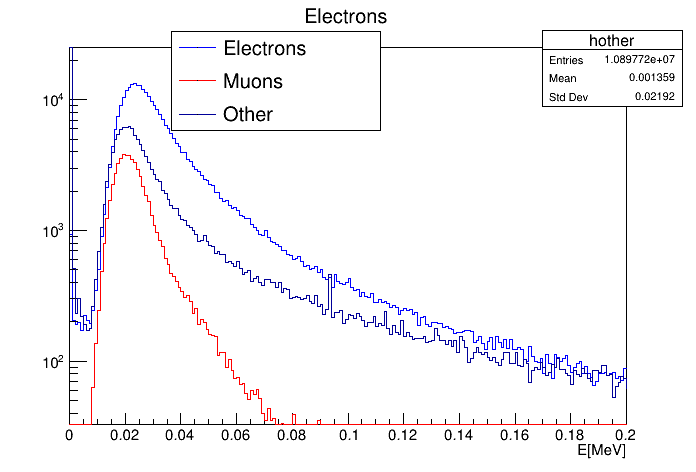

Info in <TCanvas::SaveAs>: ROOT file energylossemulsionfilms.root has been created


In [6]:
TCanvas *c1 = new TCanvas();
helectrons->GetXaxis()->SetTitle("E[MeV]");
helectrons->GetXaxis()->SetRangeUser(0,0.2);
helectrons->Draw();
hmuons->Draw("SAMES");
hother->Draw("SAMES");
c1->SetLogy();
c1->BuildLegend();
gStyle->SetLegendFont(60);
c1->Draw();
c1->Print("energylossemulsionfilms.root");